In [1]:
# Importing necessary libraries for data analysis, numerical array manipulation, random number generation, and result visualization.
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt
# Loading datasets from TSV files
name_basics = pd.read_csv('data/name.basics.tsv', sep = '\t', usecols=['nconst', 'primaryName', 'primaryProfession', 'knownForTitles'])
title_basics = pd.read_csv('data/title.basics.tsv', sep = '\t', usecols=['tconst', 'titleType', 'primaryTitle', 'genres'])
title_ratings = pd.read_csv('data/title.ratings.tsv', sep = '\t', usecols=['tconst', 'numVotes'])
title_principals = pd.read_csv('data/title.principals.tsv', sep = '\t', usecols=['tconst', 'ordering', 'nconst', 'category'])

In [2]:
# Filtering only the movies and desired categories
filtered_titles = title_basics[(title_basics['titleType'] == 'movie')]
filtered_title_principals = title_principals[title_principals['category'].isin(['actor', 'actress', 'director'])]
filtered_movies_with_ratings = filtered_titles.merge(title_ratings, on='tconst', how='inner')
# Join relevant data for the quiz
movie_data = filtered_title_principals.merge(name_basics, on='nconst', how='inner')

In [3]:
# Sort the movies by the number of votes and select the top 450
top_450_votes = filtered_movies_with_ratings.nlargest(450, 'numVotes')
# Divide by difficulty level
easy = top_450_votes.iloc[0:150]
medium = top_450_votes.iloc[150:300]
hard = top_450_votes.iloc[300:450]

In [4]:
# Function to obtain unique questions and define the points from each level
def get_questions(level):
    if level == 'easy':
        movies = easy
        points = 10
    elif level == 'medium':
        movies = medium
        points = 20
    elif level == 'hard':
        movies = hard
        points = 30
    else:
        print("Invalid level selected. Please choose easy, medium, or hard.")
        return

    questions = []
    selected_movies = set()

    # Select principal actors (ordering 1) for the questions
    actor_data = movie_data[
        (movie_data['category'].isin(['actor', 'actress'])) & (movie_data['ordering'] == 1)
    ].merge(movies, on='tconst')
    
    actor_questions = actor_data.iloc[np.random.choice(len(actor_data), size=4, replace=False)]  # NumPy para muestreo
    
    for _, row in actor_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "actor"))
            selected_movies.add(row['tconst'])

    # Select directors for the questions
    director_data = movie_data[movie_data['category'] == 'director'].merge(movies, on='tconst')
    director_questions = director_data.iloc[np.random.choice(len(director_data), size=2, replace=False)]  # NumPy para muestreo
    
    for _, row in director_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "director"))
            selected_movies.add(row['tconst'])

    return questions, points

In [5]:
# Function to ask the question and generate alternatives
def ask_question(movie_title, correct_answer, role):
    alternatives = [correct_answer]
    all_names = np.array(name_basics['primaryName'].tolist())  # Converts the list to a NumPy array
    
    while len(alternatives) < 4:
        random_choice = np.random.choice(all_names)  # Random selection using NumPy
        if random_choice not in alternatives:
            alternatives.append(random_choice)
    np.random.shuffle(alternatives)  # Shuffle the alternatives using NumPy

    question_text = f"Who starred the movie \"{movie_title}\"?" if role == "actor" else f"Who is the director of the movie \"{movie_title}\"?"
    print(f"\n{question_text}")
    for i, option in enumerate(alternatives, 1):
        print(f"{i}. {option}")
    return alternatives.index(correct_answer) + 1

Definition of the principal function of the quiz

In [6]:
def quiz():
    print("Welcome to the Movie Quiz!")
    level = input("Choose difficulty level (easy, medium, hard): ").lower()
    questions, points = get_questions(level)
    
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points  # Maximum score

In [ ]:
def start_quiz():
    print("Welcome to the Movie Quiz!")
    level = input("Choose difficulty level (easy, medium, hard): ").lower()
    questions, points = get_questions(level)
    
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points  # Maximum score

    for movie_title, correct_answer, role in questions:
        correct_option = ask_question(movie_title, correct_answer, role)
        
        try:
            answer = int(input("Your answer (1-4): "))
            if answer < 1 or answer > 4:
                print("Invalid input. Please enter a number between 1 and 4.")
                continue
            elif answer == correct_option:
                print("Correct!")
                score += points
            else:
                print(f"Incorrect. The correct answer was {correct_answer}.")
        except ValueError:
            print("Invalid input. Please enter a number between 1 and 4.")
    
    print(f"\nQuiz finished! Your final score is: {score}")

    # Creation of a function to visualize the score using Matplotlib
    plot_score(score, max_score, level)
    
# Use of matplotlib
# Function to visualize the score
def plot_score(user_score, max_score, level):
    categories = ['Your Score', 'Max Score']
    scores = [user_score, max_score]
    
    # Calculate percentage of score using Numpy
    percentage = np.round((user_score / max_score) * 100, 2)
    print(f"You scored {percentage}% of the maximum points.")

    plt.figure(figsize=(8, 5))
    plt.bar(categories, scores, color=['green', 'blue'])
    plt.xlabel("Score Categories")
    plt.ylabel("Points")
    plt.title(f"Quiz Results - Difficulty: {level.capitalize()}\nScore: {percentage}%")
    plt.show()

In [9]:
# Start the quiz
quiz()

Welcome to the Movie Quiz!


Welcome to the Movie Quiz!

Who starred the movie "Mad Max: Fury Road"?
1. Luke McFarland
2. Tom Hardy
3. Harry Sangmeister
4. Debbie Trentham
Incorrect. The correct answer was Tom Hardy.

Who starred the movie "Kill Bill: Vol. 1"?
1. Jordan Rich
2. Uma Thurman
3. Kreyol La
4. Steve Cox
Correct!

Who starred the movie "Gladiator"?
1. Russell Crowe
2. Hina Makimura
3. Barabara Jo Stetzelberger
4. Fernando Mignoni
Correct!

Who starred the movie "A Beautiful Mind"?
1. Brandon Leftridge
2. Linnéa Krantz Vesterberg
3. Russell Crowe
4. Sharon Sberlo
Correct!

Who is the director of the movie "Léon: The Professional"?
1. Luc Besson
2. Marlene Nacaspaca
3. Donald R. Morgan
4. Christopher Lanham
Incorrect. The correct answer was Luc Besson.

Who is the director of the movie "Once Upon a Time... in Hollywood"?
1. Marlon Streb
2. Quentin Tarantino
3. Zhang Wentian
4. Hayleyjane Ford
Correct!

Quiz finished! Your final score is: 40
You scored 66.67% of the maximum points.


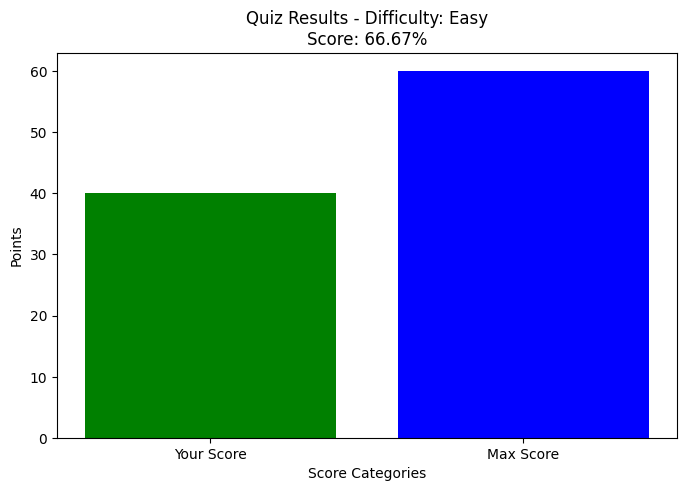

In [ ]:
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt

name_basics = pd.read_csv('data/name.basics.tsv', sep = '\t', usecols=['nconst', 'primaryName', 'primaryProfession', 'knownForTitles'])
title_basics = pd.read_csv('data/title.basics.tsv', sep = '\t', usecols=['tconst', 'titleType', 'primaryTitle', 'genres'])
title_ratings = pd.read_csv('data/title.ratings.tsv', sep = '\t', usecols=['tconst', 'numVotes'])
title_principals = pd.read_csv('data/title.principals.tsv', sep = '\t', usecols=['tconst', 'ordering', 'nconst', 'category'])

# Filter the genres that I don't want
filtered_titles = title_basics[
    (title_basics['titleType'] == 'movie') &
    (~title_basics['genres'].str.contains(r'Animation|News|\\N|Film-Noir|Talk-Show|Adult|Reality-TV|Game-Show', na=False, regex=True))
]

filtered_title_principals = title_principals[title_principals['category'].isin(['actor', 'actress', 'director'])]
filtered_movies_with_ratings = filtered_titles.merge(title_ratings, on='tconst', how='inner')

top_450_votes = filtered_movies_with_ratings.nlargest(450, 'numVotes')

easy = top_450_votes.iloc[0:150]
medium = top_450_votes.iloc[150:300]
hard = top_450_votes.iloc[300:450]

movie_data = filtered_title_principals.merge(name_basics, on='nconst', how='inner')

filtered_titles = title_basics[(title_basics['titleType'] == 'movie')]
filtered_title_principals = title_principals[title_principals['category'].isin(['actor', 'actress', 'director'])]
filtered_movies_with_ratings = filtered_titles.merge(title_ratings, on='tconst', how='inner')
movie_data = filtered_title_principals.merge(name_basics, on='nconst', how='inner')
top_450_votes = filtered_movies_with_ratings.nlargest(450, 'numVotes')
easy = top_450_votes.iloc[0:150]
medium = top_450_votes.iloc[150:300]
hard = top_450_votes.iloc[300:450]

def get_questions(level):
    if level == 'easy':
        movies = easy
        points = 10
    elif level == 'medium':
        movies = medium
        points = 20
    elif level == 'hard':
        movies = hard
        points = 30
    else:
        print("Invalid level selected. Please choose easy, medium, or hard.")
        return

    questions = []
    selected_movies = set()

    
    actor_data = movie_data[
        (movie_data['category'].isin(['actor', 'actress'])) & (movie_data['ordering'] == 1)
    ].merge(movies, on='tconst')
    
    actor_questions = actor_data.iloc[np.random.choice(len(actor_data), size=4, replace=False)] 
    
    for _, row in actor_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "actor"))
            selected_movies.add(row['tconst'])

    
    director_data = movie_data[movie_data['category'] == 'director'].merge(movies, on='tconst')
    director_questions = director_data.iloc[np.random.choice(len(director_data), size=2, replace=False)] 
    
    for _, row in director_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "director"))
            selected_movies.add(row['tconst'])

    return questions, points

def ask_question(movie_title, correct_answer, role):
    alternatives = [correct_answer]
    all_names = np.array(name_basics['primaryName'].tolist()) 
    
    while len(alternatives) < 4:
        random_choice = np.random.choice(all_names) 
        if random_choice not in alternatives:
            alternatives.append(random_choice)
    np.random.shuffle(alternatives)  

    question_text = f"Who starred the movie \"{movie_title}\"?" if role == "actor" else f"Who is the director of the movie \"{movie_title}\"?"
    print(f"\n{question_text}")
    for i, option in enumerate(alternatives, 1):
        print(f"{i}. {option}")
    return alternatives.index(correct_answer) + 1



def start_quiz():
    print("Welcome to the Movie Quiz!")
    level = input("Choose difficulty level (easy, medium, hard): ").lower()
    questions, points = get_questions(level)
    
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points 

    for movie_title, correct_answer, role in questions:
        correct_option = ask_question(movie_title, correct_answer, role)
        
        try:
            answer = int(input("Your answer (1-4): "))
            if answer < 1 or answer > 4:
                print("Invalid input. Please enter a number between 1 and 4.")
                continue
            elif answer == correct_option:
                print("Correct!")
                score += points
            else:
                print(f"Incorrect. The correct answer was {correct_answer}.")
        except ValueError:
            print("Invalid input. Please enter a number between 1 and 4.")
    
    print(f"\nQuiz finished! Your final score is: {score}")

    plot_score(score, max_score, level)

def plot_score(user_score, max_score, level):
    categories = ['Your Score', 'Max Score']
    scores = [user_score, max_score]
    
    percentage = np.round((user_score / max_score) * 100, 2)
    print(f"You scored {percentage}% of the maximum points.")

    plt.figure(figsize=(8, 5))
    plt.bar(categories, scores, color=['green', 'blue'])
    plt.xlabel("Score Categories")
    plt.ylabel("Points")
    plt.title(f"Quiz Results - Difficulty: {level.capitalize()}\nScore: {percentage}%")
    plt.show()

start_quiz()

In [ ]:
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt

name_basics = pd.read_csv('data/name.basics.tsv', sep = '\t', usecols=['nconst', 'primaryName', 'primaryProfession', 'knownForTitles'])
title_basics = pd.read_csv('data/title.basics.tsv', sep = '\t', usecols=['tconst', 'titleType', 'primaryTitle', 'genres'])
title_ratings = pd.read_csv('data/title.ratings.tsv', sep = '\t', usecols=['tconst', 'numVotes'])
title_principals = pd.read_csv('data/title.principals.tsv', sep = '\t', usecols=['tconst', 'ordering', 'nconst', 'category'])

# Filter the genres that I don't want
filtered_titles = title_basics[
    (title_basics['titleType'] == 'movie') &
    (~title_basics['genres'].str.contains(r'Animation|News|\\N|Film-Noir|Talk-Show|Adult|Reality-TV|Game-Show', na=False, regex=True))
]

filtered_title_principals = title_principals[title_principals['category'].isin(['actor', 'actress', 'director'])]
filtered_movies_with_ratings = filtered_titles.merge(title_ratings, on='tconst', how='inner')

top_450_votes = filtered_movies_with_ratings.nlargest(450, 'numVotes')

easy = top_450_votes.iloc[0:150]
medium = top_450_votes.iloc[150:300]
hard = top_450_votes.iloc[300:450]

movie_data = filtered_title_principals.merge(name_basics, on='nconst', how='inner')

def get_questions(level):
    if level == 'easy':
        movies = easy
        points = 10
    elif level == 'medium':
        movies = medium
        points = 20
    elif level == 'hard':
        movies = hard
        points = 30
    else:
        print("Invalid level selected. Please choose easy, medium, or hard.")
        return

    questions = []
    selected_movies = set()

    
    actor_data = movie_data[
        (movie_data['category'].isin(['actor', 'actress'])) & (movie_data['ordering'] == 1)
    ].merge(movies, on='tconst')
    
    actor_questions = actor_data.iloc[np.random.choice(len(actor_data), size=4, replace=False)] 
    
    for _, row in actor_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "actor"))
            selected_movies.add(row['tconst'])

    
    director_data = movie_data[movie_data['category'] == 'director'].merge(movies, on='tconst')
    director_questions = director_data.iloc[np.random.choice(len(director_data), size=2, replace=False)] 
    
    for _, row in director_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "director"))
            selected_movies.add(row['tconst'])

    return questions, points

def ask_question(movie_title, correct_answer, role):
    alternatives = [correct_answer]
    all_names = np.array(name_basics['primaryName'].tolist()) 
    
    while len(alternatives) < 4:
        random_choice = np.random.choice(all_names) 
        if random_choice not in alternatives:
            alternatives.append(random_choice)
    np.random.shuffle(alternatives)  

    question_text = f"Who starred the movie \"{movie_title}\"?" if role == "actor" else f"Who is the director of the movie \"{movie_title}\"?"
    print(f"\n{question_text}")
    for i, option in enumerate(alternatives, 1):
        print(f"{i}. {option}")
    return alternatives.index(correct_answer) + 1



def start_quiz():
    print("Welcome to the Movie Quiz!")
    level = input("Choose difficulty level (easy, medium, hard): ").lower()
    questions, points = get_questions(level)
    
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points 

    for movie_title, correct_answer, role in questions:
        correct_option = ask_question(movie_title, correct_answer, role)
        
        try:
            answer = int(input("Your answer (1-4): "))
            if answer < 1 or answer > 4:
                print("Invalid input. Please enter a number between 1 and 4.")
                continue
            elif answer == correct_option:
                print("Correct!")
                score += points
            else:
                print(f"Incorrect. The correct answer was {correct_answer}.")
        except ValueError:
            print("Invalid input. Please enter a number between 1 and 4.")
    
    print(f"\nQuiz finished! Your final score is: {score}")

    plot_score(score, max_score, level)

def plot_score(user_score, max_score, level):
    categories = ['Your Score', 'Max Score']
    scores = [user_score, max_score]
    
    percentage = np.round((user_score / max_score) * 100, 2)
    print(f"You scored {percentage}% of the maximum points.")

    plt.figure(figsize=(8, 5))
    plt.bar(categories, scores, color=['green', 'blue'])
    plt.xlabel("Score Categories")
    plt.ylabel("Points")
    plt.title(f"Quiz Results - Difficulty: {level.capitalize()}\nScore: {percentage}%")
    plt.show()

start_quiz()

Welcome to the Movie Quiz!

Who starred the movie "Dune: Part One"?
1. Timothée Chalamet
2. Anastasia Chala
3. Katie Macgruder
4. Noam Levin
Correct!

Who starred the movie "The Lord of the Rings: The Fellowship of the Ring"?
1. Lance Bogart
2. Véni Lacombe
3. Chu-chu Lin
4. Elijah Wood
Correct!

Who starred the movie "Full Metal Jacket"?
1. Mirella Dell'Aquila
2. James Fair
3. Ralph Pauly
4. Matthew Modine
Incorrect. The correct answer was Matthew Modine.

Who starred the movie "Snatch"?
1. Case Gonzalez
2. Jason Statham
3. Shaolin
4. Eric Williams
Incorrect. The correct answer was Jason Statham.

Who is the director of the movie "The Prestige"?
1. Melody
2. Ben Kelder
3. Tom Peoples
4. Christopher Nolan
Correct!

Who is the director of the movie "Star Wars: Episode I - The Phantom Menace"?
1. Jesse Valdez
2. Azariah Burnett
3. Martin Kistler
4. George Lucas
Correct!

Quiz finished! Your final score is: 40
You scored 66.67% of the maximum points.


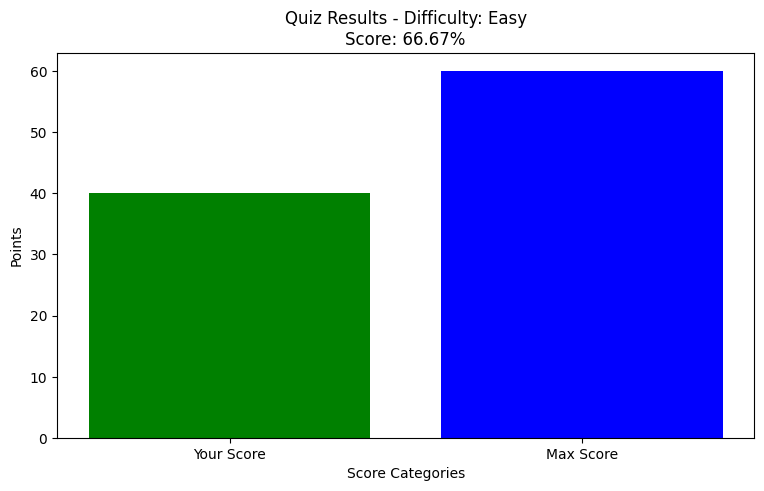

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

name_basics = pd.read_csv(
    'data/name.basics.tsv', 
    sep='\t', 
    usecols=['nconst', 'primaryName', 'primaryProfession', 'knownForTitles'],
    dtype={'nconst': 'str', 'primaryName': 'str', 'primaryProfession': 'str', 'knownForTitles': 'str'}
)

title_basics = pd.read_csv(
    'data/title.basics.tsv', 
    sep='\t', 
    usecols=['tconst', 'titleType', 'primaryTitle', 'genres'],
    dtype={'tconst': 'str', 'titleType': 'str', 'primaryTitle': 'str', 'genres': 'str'}
)

title_ratings = pd.read_csv(
    'data/title.ratings.tsv', 
    sep='\t', 
    usecols=['tconst', 'numVotes'],
    dtype={'tconst': 'str', 'numVotes': 'int32'}
)

title_principals = pd.read_csv(
    'data/title.principals.tsv', 
    sep='\t', 
    usecols=['tconst', 'ordering', 'nconst', 'category'],
    dtype={'tconst': 'str', 'ordering': 'int32', 'nconst': 'str', 'category': 'category'}
)

# Filter the genres that I don't want
filtered_titles = title_basics[
    (title_basics['titleType'] == 'movie') & 
    (~title_basics['genres'].str.contains(r'Animation|News|\\N|Film-Noir|Talk-Show|Adult|Reality-TV|Game-Show', na=False, regex=True))
]

filtered_title_principals = title_principals[title_principals['category'].isin(['actor', 'actress', 'director'])]
filtered_movies_with_ratings = filtered_titles.merge(title_ratings, on='tconst', how='inner')

top_450_votes = filtered_movies_with_ratings.nlargest(450, 'numVotes')

easy = top_450_votes.iloc[0:150]
medium = top_450_votes.iloc[150:300]
hard = top_450_votes.iloc[300:450]

movie_data = filtered_title_principals.merge(name_basics, on='nconst', how='inner')

def get_questions(level):
    if level == 'easy':
        movies = easy
        points = 10
    elif level == 'medium':
        movies = medium
        points = 20
    elif level == 'hard':
        movies = hard
        points = 30
    else:
        print("Invalid level selected. Please choose easy, medium, or hard.")
        return

    questions = []
    selected_movies = set()

    actor_data = movie_data[
        (movie_data['category'].isin(['actor', 'actress'])) & (movie_data['ordering'] == 1)
    ].merge(movies, on='tconst')
    
    actor_questions = actor_data.iloc[np.random.choice(len(actor_data), size=4, replace=False)] 
    
    for _, row in actor_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "actor"))
            selected_movies.add(row['tconst'])

    director_data = movie_data[movie_data['category'] == 'director'].merge(movies, on='tconst')
    director_questions = director_data.iloc[np.random.choice(len(director_data), size=2, replace=False)] 
    
    for _, row in director_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "director"))
            selected_movies.add(row['tconst'])

    return questions, points

def ask_question(movie_title, correct_answer, role):
    alternatives = [correct_answer]
    all_names = np.array(name_basics['primaryName'].tolist()) 
    
    while len(alternatives) < 4:
        random_choice = np.random.choice(all_names) 
        if random_choice not in alternatives:
            alternatives.append(random_choice)
    np.random.shuffle(alternatives)  

    question_text = f"Who starred the movie \"{movie_title}\"?" if role == "actor" else f"Who is the director of the movie \"{movie_title}\"?"
    print(f"\n{question_text}")
    for i, option in enumerate(alternatives, 1):
        print(f"{i}. {option}")
    return alternatives.index(correct_answer) + 1

def start_quiz():
    print("Welcome to the Movie Quiz!")
    level = input("Choose difficulty level (easy, medium, hard): ").lower()
    questions, points = get_questions(level)
    
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points 

    for movie_title, correct_answer, role in questions:
        correct_option = ask_question(movie_title, correct_answer, role)
        
        try:
            answer = int(input("Your answer (1-4): "))
            if answer < 1 or answer > 4:
                print("Invalid input. Please enter a number between 1 and 4.")
                continue
            elif answer == correct_option:
                print("Correct!")
                score += points
            else:
                print(f"Incorrect. The correct answer was {correct_answer}.")
        except ValueError:
            print("Invalid input. Please enter a number between 1 and 4.")
    
    print(f"\nQuiz finished! Your final score is: {score}")

    plot_score(score, max_score, level)

def plot_score(user_score, max_score, level):
    categories = ['Your Score', 'Max Score']
    scores = [user_score, max_score]
    
    percentage = np.round((user_score / max_score) * 100, 2)
    print(f"You scored {percentage}% of the maximum points.")

    plt.figure(figsize=(9, 5))
    plt.bar(categories, scores, color=['green', 'blue'])
    plt.xlabel("Score Categories")
    plt.ylabel("Points")
    plt.title(f"Quiz Results - Difficulty: {level.capitalize()}\nScore: {percentage}%")
    plt.show()

start_quiz()

In [ ]:
import random

actor_questions = actor_data.sample(4, replace=False)
director_questions = director_data.sample(2, replace=False)


NameError: name 'actor_data' is not defined

Welcome to the Movie Quiz!

Who starred the movie "X-Men: First Class"?
1. Lisa Warsniak
2. James McAvoy
3. Vincent Grass
4. Abdul Ahad Ayyaril
Correct!

Who starred the movie "Thor"?
1. Daniel Olewine
2. Chris Hemsworth
3. Camille Hollins
4. Manos Lefakis
Incorrect. The correct answer was Chris Hemsworth.

Who starred the movie "Harry Potter and the Deathly Hallows: Part 2"?
1. Kevin Phan
2. Daniel Radcliffe
3. Qin Yan
4. Xia Amani
Correct!

Who starred the movie "The Avengers"?
1. Robert Downey Jr.
2. Rhein Matlack
3. Rob Muller
4. Rachel Forney
Correct!

Who is the director of the movie "Saving Private Ryan"?
1. Arnaud Dormeuil
2. Nikolay Mihaylov
3. Steven Spielberg
4. Nina Diaz
Correct!

Who is the director of the movie "American History X"?
1. Brice Anoh
2. Courtney Lether
3. Tony Kaye
4. Jian Hua Ma
Incorrect. The correct answer was Tony Kaye.

Quiz finished! Your final score is: 40
You scored 66.67% of the maximum points.


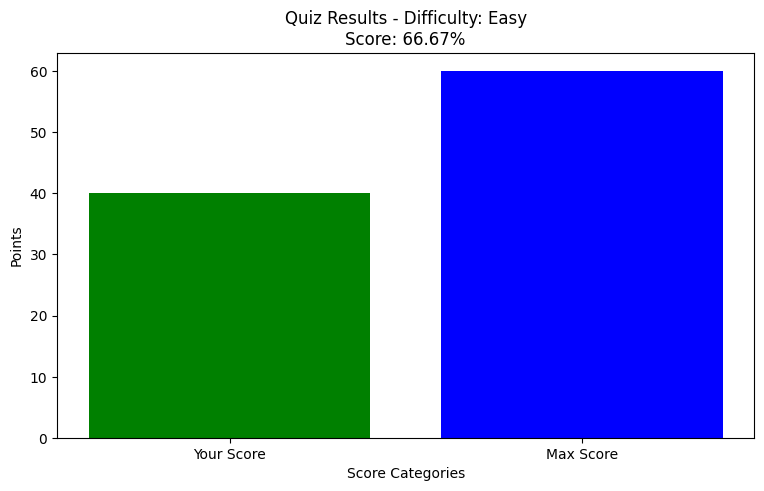

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

name_basics = pd.read_csv(
    'data/name.basics.tsv', 
    sep='\t', 
    usecols=['nconst', 'primaryName', 'primaryProfession', 'knownForTitles'],
    dtype={'nconst': 'str', 'primaryName': 'str', 'primaryProfession': 'str', 'knownForTitles': 'str'}
)

title_basics = pd.read_csv(
    'data/title.basics.tsv', 
    sep='\t', 
    usecols=['tconst', 'titleType', 'primaryTitle', 'genres'],
    dtype={'tconst': 'str', 'titleType': 'str', 'primaryTitle': 'str', 'genres': 'str'}
)

title_ratings = pd.read_csv(
    'data/title.ratings.tsv', 
    sep='\t', 
    usecols=['tconst', 'numVotes'],
    dtype={'tconst': 'str', 'numVotes': 'int32'}
)

title_principals = pd.read_csv(
    'data/title.principals.tsv', 
    sep='\t', 
    usecols=['tconst', 'ordering', 'nconst', 'category'],
    dtype={'tconst': 'str', 'ordering': 'int32', 'nconst': 'str', 'category': 'category'}
)

# Filter the genres that I don't want
filtered_titles = title_basics[
    (title_basics['titleType'] == 'movie') & 
    (~title_basics['genres'].str.contains(r'Animation|News|\\N|Film-Noir|Talk-Show|Adult|Reality-TV|Game-Show', na=False, regex=True))
]

filtered_title_principals = title_principals[title_principals['category'].isin(['actor', 'actress', 'director'])]
filtered_movies_with_ratings = filtered_titles.merge(title_ratings, on='tconst', how='inner')

top_450_votes = filtered_movies_with_ratings.nlargest(450, 'numVotes')

easy = top_450_votes.iloc[0:150]
medium = top_450_votes.iloc[150:300]
hard = top_450_votes.iloc[300:450]

movie_data = filtered_title_principals.merge(name_basics, on='nconst', how='inner')

def get_questions(level):
    if level == 'easy':
        movies = easy
        points = 10
    elif level == 'medium':
        movies = medium
        points = 20
    elif level == 'hard':
        movies = hard
        points = 30
    else:
        print("Invalid level selected. Please choose easy, medium, or hard.")
        return

    questions = []
    selected_movies = set()

    actor_data = movie_data[
        (movie_data['category'].isin(['actor', 'actress'])) & (movie_data['ordering'] == 1)
    ].merge(movies, on='tconst')
    
    actor_questions = random.sample(list(actor_data.to_dict(orient='records')), k=4)
    
    for row in actor_questions:
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "actor"))
            selected_movies.add(row['tconst'])

    director_data = movie_data[movie_data['category'] == 'director'].merge(movies, on='tconst')

    director_questions = random.sample(list(director_data.to_dict(orient='records')), k=2)
    
    for row in director_questions:
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "director"))
            selected_movies.add(row['tconst'])

    return questions, points

def ask_question(movie_title, correct_answer, role):
    alternatives = [correct_answer]
    all_names = np.array(name_basics['primaryName'].tolist()) 
    
    while len(alternatives) < 4:
        random_choice = np.random.choice(all_names) 
        if random_choice not in alternatives:
            alternatives.append(random_choice)
    np.random.shuffle(alternatives)  

    question_text = f"Who starred the movie \"{movie_title}\"?" if role == "actor" else f"Who is the director of the movie \"{movie_title}\"?"
    print(f"\n{question_text}")
    for i, option in enumerate(alternatives, 1):
        print(f"{i}. {option}")
    return alternatives.index(correct_answer) + 1

def start_quiz():
    print("Welcome to the Movie Quiz!")
    level = input("Choose difficulty level (easy, medium, hard): ").lower()
    questions, points = get_questions(level)
    
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points 

    for movie_title, correct_answer, role in questions:
        correct_option = ask_question(movie_title, correct_answer, role)
        
        try:
            answer = int(input("Your answer (1-4): "))
            if answer < 1 or answer > 4:
                print("Invalid input. Please enter a number between 1 and 4.")
                continue
            elif answer == correct_option:
                print("Correct!")
                score += points
            else:
                print(f"Incorrect. The correct answer was {correct_answer}.")
        except ValueError:
            print("Invalid input. Please enter a number between 1 and 4.")
    
    print(f"\nQuiz finished! Your final score is: {score}")

    plot_score(score, max_score, level)

def plot_score(user_score, max_score, level):
    categories = ['Your Score', 'Max Score']
    scores = [user_score, max_score]
    
    percentage = np.round((user_score / max_score) * 100, 2)
    print(f"You scored {percentage}% of the maximum points.")

    plt.figure(figsize=(9, 5))
    plt.bar(categories, scores, color=['green', 'blue'])
    plt.xlabel("Score Categories")
    plt.ylabel("Points")
    plt.title(f"Quiz Results - Difficulty: {level.capitalize()}\nScore: {percentage}%")
    plt.show()

start_quiz()

Welcome to the Movie Quiz!

Who starred the movie "Thor: The Dark World"?
1. Chris Hemsworth
2. Joel Bridal
3. Curt Morrow
4. Marc Graham
Correct!

Who starred the movie "The Sixth Sense"?
1. Morten Krebs
2. Pussy Riot
3. Fábio Teixeira
4. Bruce Willis
Correct!

Who starred the movie "Pirates of the Caribbean: Dead Man's Chest"?
1. Maria Kohn
2. Johnny Depp
3. Toril V. Susegg
4. Eric Donkin
Correct!

Who starred the movie "Star Wars: Episode V - The Empire Strikes Back"?
1. Timur Turga
2. Mark Hamill
3. Robert Hockley
4. Raven Rolle
Correct!

Who is the director of the movie "The Social Network"?
1. Chang-Tsui Yang
2. David Fincher
3. Barbara Brown
4. Mario Nepomuceno
Correct!

Who is the director of the movie "Black Swan"?
1. Hunter Benson
2. André Almeida
3. Darren Aronofsky
4. Barbara Cohen
Incorrect. The correct answer was Darren Aronofsky.

Quiz finished! Your final score is: 50
You scored 83.33% of the maximum points.


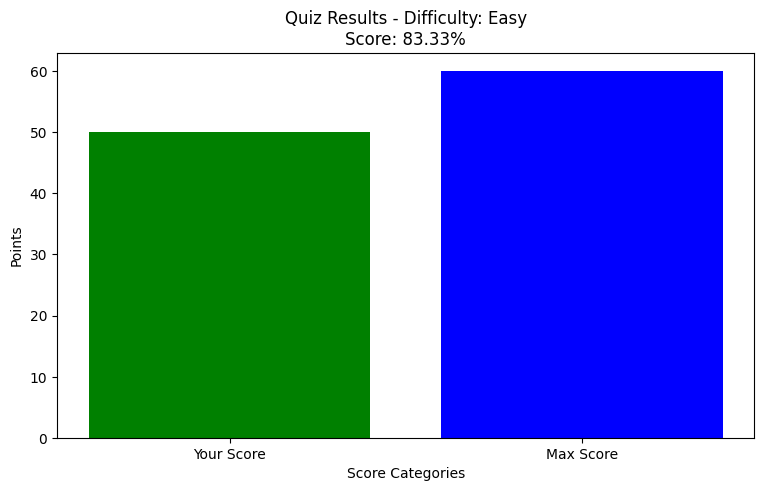

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

name_basics = pd.read_csv(
    'data/name.basics.tsv', 
    sep='\t', 
    usecols=['nconst', 'primaryName', 'primaryProfession', 'knownForTitles'],
    dtype={'nconst': 'str', 'primaryName': 'str', 'primaryProfession': 'str', 'knownForTitles': 'str'}
)

title_basics = pd.read_csv(
    'data/title_basics_reduced.csv', 
    usecols=['tconst', 'titleType', 'primaryTitle', 'genres'],
    dtype={'tconst': 'str', 'titleType': 'str', 'primaryTitle': 'str', 'genres': 'str'}
)

title_ratings = pd.read_csv(
    'data/title.ratings.tsv', 
    sep='\t', 
    usecols=['tconst', 'numVotes'],
    dtype={'tconst': 'str', 'numVotes': 'int32'}
)

title_principals = pd.read_csv(
    'data/title_principals_reduced.csv',
    usecols=['tconst', 'ordering', 'nconst', 'category'],
    dtype={'tconst': 'str', 'ordering': 'int32', 'nconst': 'str', 'category': 'category'}
)

filtered_titles = title_basics[
    (title_basics['titleType'] == 'movie') & 
    (~title_basics['genres'].str.contains(r'Animation|News|\\N|Film-Noir|Talk-Show|Adult|Reality-TV|Game-Show', na=False, regex=True))
]

filtered_title_principals = title_principals[title_principals['category'].isin(['actor', 'actress', 'director'])]
filtered_movies_with_ratings = filtered_titles.merge(title_ratings, on='tconst', how='inner')

top_450_votes = filtered_movies_with_ratings.nlargest(450, 'numVotes')

easy = top_450_votes.iloc[0:150]
medium = top_450_votes.iloc[150:300]
hard = top_450_votes.iloc[300:450]

movie_data = filtered_title_principals.merge(name_basics, on='nconst', how='inner')

def get_questions(level):
    if level == 'easy':
        movies = easy
        points = 10
    elif level == 'medium':
        movies = medium
        points = 20
    elif level == 'hard':
        movies = hard
        points = 30
    else:
        print("Invalid level selected. Please choose easy, medium, or hard.")
        return

    questions = []
    selected_movies = set()

    actor_data = movie_data[
        (movie_data['category'].isin(['actor', 'actress'])) & (movie_data['ordering'] == 1)
    ].merge(movies, on='tconst')
    
    actor_questions = random.sample(list(actor_data.to_dict(orient='records')), k=4)
    
    for row in actor_questions:
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "actor"))
            selected_movies.add(row['tconst'])

    director_data = movie_data[movie_data['category'] == 'director'].merge(movies, on='tconst')

    director_questions = random.sample(list(director_data.to_dict(orient='records')), k=2)
    
    for row in director_questions:
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "director"))
            selected_movies.add(row['tconst'])

    return questions, points

def ask_question(movie_title, correct_answer, role):
    alternatives = [correct_answer]
    all_names = np.array(name_basics['primaryName'].tolist()) 
    
    while len(alternatives) < 4:
        random_choice = np.random.choice(all_names) 
        if random_choice not in alternatives:
            alternatives.append(random_choice)
    np.random.shuffle(alternatives)  

    question_text = f"Who starred the movie \"{movie_title}\"?" if role == "actor" else f"Who is the director of the movie \"{movie_title}\"?"
    print(f"\n{question_text}")
    for i, option in enumerate(alternatives, 1):
        print(f"{i}. {option}")
    return alternatives.index(correct_answer) + 1

def start_quiz():
    print("Welcome to the Movie Quiz!")
    level = input("Choose difficulty level (easy, medium, hard): ").lower()
    questions, points = get_questions(level)
    
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points 

    for movie_title, correct_answer, role in questions:
        correct_option = ask_question(movie_title, correct_answer, role)
        
        try:
            answer = int(input("Your answer (1-4): "))
            if answer < 1 or answer > 4:
                print("Invalid input. Please enter a number between 1 and 4.")
                continue
            elif answer == correct_option:
                print("Correct!")
                score += points
            else:
                print(f"Incorrect. The correct answer was {correct_answer}.")
        except ValueError:
            print("Invalid input. Please enter a number between 1 and 4.")
    
    print(f"\nQuiz finished! Your final score is: {score}")

    plot_score(score, max_score, level)

def plot_score(user_score, max_score, level):
    categories = ['Your Score', 'Max Score']
    scores = [user_score, max_score]
    
    percentage = np.round((user_score / max_score) * 100, 2)
    print(f"You scored {percentage}% of the maximum points.")

    plt.figure(figsize=(9, 5))
    plt.bar(categories, scores, color=['green', 'blue'])
    plt.xlabel("Score Categories")
    plt.ylabel("Points")
    plt.title(f"Quiz Results - Difficulty: {level.capitalize()}\nScore: {percentage}%")
    plt.show()

start_quiz()

Welcome to the Movie Quiz!

Who starred the movie "Iron Man 3"?
1. Clive Francis
2. Colin Farrell
3. Rebecca Romijn
4. Robert Downey Jr.
Invalid input. Please enter a number between 1 and 4.
Correct!

Who starred the movie "Inception"?
1. Ty Simpkins
2. Jake Gyllenhaal
3. Leonardo DiCaprio
4. Cliff Robertson
Correct!

Who starred the movie "Memento"?
1. Andy Serkis
2. Guy Pearce
3. Angela Goethals
4. David Thewlis
Correct!

Who starred the movie "Terminator 2: Judgment Day"?
1. Steve Bastoni
2. Rebecca Romijn
3. Alima Ashton-Sheibu
4. Arnold Schwarzenegger
Incorrect. The correct answer was Arnold Schwarzenegger.

Who is the director of the movie "X-Men: Days of Future Past"?
1. Bryan Singer
2. David Kelly
3. Keanu Reeves
4. Tom Hardy
Incorrect. The correct answer was Bryan Singer.

Who is the director of the movie "Aliens"?
1. Scarlett Johansson
2. Dileep Rao
3. Harvey Keitel
4. James Cameron
Correct!

Quiz finished! Your final score is: 40 out of 60.
You scored 66.67% of the maximum p

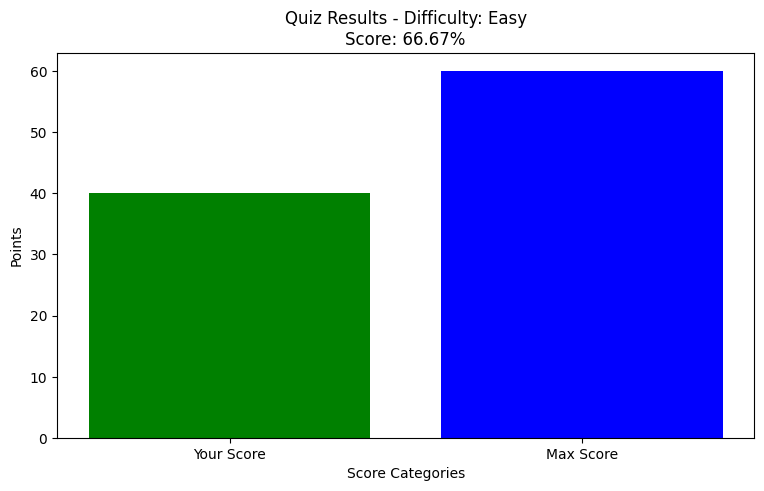

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

name_basics = pd.read_csv(
    'C:/Users/20152/OneDrive/Escritorio/Python_project/data/name.basics.tsv', 
    sep='\t', 
    usecols=['nconst', 'primaryName', 'primaryProfession', 'knownForTitles'],
    dtype={'nconst': 'str', 'primaryName': 'str', 'primaryProfession': 'str', 'knownForTitles': 'str'}
)

title_basics = pd.read_csv(
    'C:/Users/20152/OneDrive/Escritorio/Python_project/data/title_basics_reduced.csv', 
    usecols=['tconst', 'titleType', 'primaryTitle', 'genres'],
    dtype={'tconst': 'str', 'titleType': 'str', 'primaryTitle': 'str', 'genres': 'str'}
)

title_ratings = pd.read_csv(
    'C:/Users/20152/OneDrive/Escritorio/Python_project/data/title.ratings.tsv', 
    sep='\t', 
    usecols=['tconst', 'numVotes'],
    dtype={'tconst': 'str', 'numVotes': 'int32'}
)

title_principals = pd.read_csv(
    'C:/Users/20152/OneDrive/Escritorio/Python_project/data/title_principals_reduced.csv',
    usecols=['tconst', 'ordering', 'nconst', 'category'],
    dtype={'tconst': 'str', 'ordering': 'int32', 'nconst': 'str', 'category': 'category'}
)

filtered_titles = title_basics[
    (title_basics['titleType'] == 'movie') & 
    (~title_basics['genres'].str.contains(r'Animation|News|\\N|Film-Noir|Talk-Show|Adult|Reality-TV|Game-Show', na=False, regex=True))
]

filtered_title_principals = title_principals[title_principals['category'].isin(['actor', 'actress', 'director'])]
filtered_movies_with_ratings = filtered_titles.merge(title_ratings, on='tconst', how='inner')

# Create the set of most voted movies
top_450_votes = filtered_movies_with_ratings.nlargest(450, 'numVotes')

# Filter actors from the 450 most voted movies
actors_in_top_movies = title_principals[
    (title_principals['tconst'].isin(top_450_votes['tconst'])) & 
    (title_principals['category'].isin(['actor', 'actress']))
]

# We associate the actors with the names (primaryName) from name_basics
actors_in_top_movies_with_names = actors_in_top_movies.merge(name_basics, on='nconst', how='inner')

# List of actors from the most voted films
actors_in_top_movies_list = actors_in_top_movies_with_names['primaryName'].tolist()

# Create a subset of famous
famous_people = name_basics[
    name_basics['primaryProfession'].str.contains('actor|actress|director', na=False) &
    name_basics['knownForTitles'].notna()]


easy = top_450_votes.iloc[0:150]
medium = top_450_votes.iloc[150:300]
hard = top_450_votes.iloc[300:450]


movie_data = filtered_title_principals.merge(name_basics, on='nconst', how='inner')

def get_questions(level):
    if level == 'easy':
        movies = easy
        points = 10
    elif level == 'medium':
        movies = medium
        points = 15
    elif level == 'hard':
        movies = hard
        points = 20
    else:
        print("Invalid level selected. Please choose easy, medium, or hard.")
        return

    questions = []
    selected_movies = set()

    actor_data = movie_data[(
        movie_data['category'].isin(['actor', 'actress'])) & (movie_data['ordering'] == 1)
    ].merge(movies, on='tconst')
    
    actor_questions = random.sample(list(actor_data.to_dict(orient='records')), k=4)
    
    for row in actor_questions:
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "actor"))
            selected_movies.add(row['tconst'])

    director_data = movie_data[movie_data['category'] == 'director'].merge(movies, on='tconst')

    director_questions = random.sample(list(director_data.to_dict(orient='records')), k=2)
    
    for row in director_questions:
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "director"))
            selected_movies.add(row['tconst'])

    return questions, points

def ask_question(movie_title, correct_answer, role):
    alternatives = [correct_answer]
    
    # Filter actors who are only in the most voted movies
    while len(alternatives) < 4:
        random_choice = random.choice(actors_in_top_movies_list)  # Choose a random actor from the most voted movies
        if random_choice not in alternatives:
            alternatives.append(random_choice)
    
    random.shuffle(alternatives)  

    
    question_text = f"Who starred the movie \"{movie_title}\"?" if role == "actor" else f"Who is the director of the movie \"{movie_title}\"?"
    print(f"\n{question_text}")
    for i, option in enumerate(alternatives, 1):
        print(f"{i}. {option}")
    return alternatives.index(correct_answer) + 1


def start_quiz():
    print("Welcome to the Movie Quiz!")
    
    
    while True:
        level = input("Choose difficulty level (easy, medium, hard): ").lower()
        if level in ['easy', 'medium', 'hard']:
            break
        else:
            print("Invalid level selected. Please choose 'easy', 'medium', or 'hard'.")
    
    questions, points = get_questions(level)
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points 
    question_count = 0 

    for movie_title, correct_answer, role in questions:
        correct_option = ask_question(movie_title, correct_answer, role)
        
        while True:
            try:
                answer = int(input("Your answer (1-4): "))
                if answer < 1 or answer > 4:
                    print("Invalid input. Please enter a number between 1 and 4.")
                    continue 
                break
            except ValueError:
                print("Invalid input. Please enter a number between 1 and 4.")
        
    
        question_count += 1
        if answer == correct_option:
            print("Correct!")
            score += points
        else:
            print(f"Incorrect. The correct answer was {correct_answer}.")
    
    print(f"\nQuiz finished! Your final score is: {score} out of {max_score}.")
    
    plot_score(score, max_score, level)

def plot_score(user_score, max_score, level):
    categories = ['Your Score', 'Max Score']
    scores = [user_score, max_score]
    
    percentage = np.round((user_score / max_score) * 100, 2)
    print(f"You scored {percentage}% of the maximum points.")

    plt.figure(figsize=(9, 5))
    plt.bar(categories, scores, color=['green', 'blue'])
    plt.xlabel("Score Categories")
    plt.ylabel("Points")
    plt.title(f"Quiz Results - Difficulty: {level.capitalize()}\nScore: {percentage}%")
    plt.show()

start_quiz()

Welcome to the Movie Quiz!

Who starred the movie "Shutter Island"?
1. Chris Taylor
2. Leonardo DiCaprio
3. Denis Machacka
4. Suzanne Diamond
Correct!

Who starred the movie "The Big Lebowski"?
1. Jeff Bridges
2. Nicolas Chassaing
3. Dimitris Bouzas
4. Syunichiro Yunoki
Correct!

Who starred the movie "The Departed"?
1. Romina Miranda
2. Liao Kai Ro
3. Leonardo DiCaprio
4. Sean Jefferis
Correct!

Who starred the movie "The Pianist"?
1. Zoe Fuchs
2. Adrien Brody
3. Ahmed Afifi
4. Alex Yap Young
Correct!

Who is the director of the movie "The Sixth Sense"?
1. Raoul Salter
2. Kayzee Karim
3. Hiroko Masuda
4. M. Night Shyamalan
Correct!

Who is the director of the movie "Guardians of the Galaxy"?
1. Anissa Baddour
2. James Gunn
3. Deanna R. Brindle
4. Thomas Drachenberg
Correct!

Quiz finished! Your final score is: 60 out of 60.
You scored 100.0% of the maximum points.


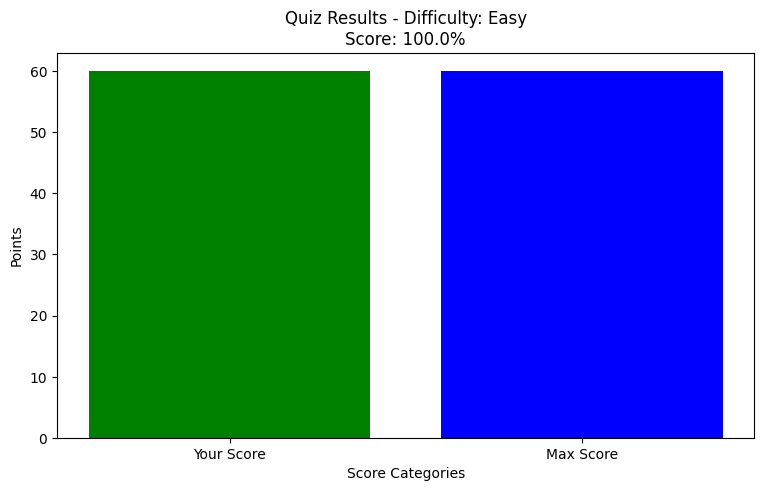

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

name_basics = pd.read_csv(
    'data/name.basics.tsv', 
    sep='\t', 
    usecols=['nconst', 'primaryName', 'primaryProfession', 'knownForTitles'],
    dtype={'nconst': 'str', 'primaryName': 'str', 'primaryProfession': 'str', 'knownForTitles': 'str'}
)

title_basics = pd.read_csv(
    'data/title_basics_reduced.csv', 
    usecols=['tconst', 'titleType', 'primaryTitle', 'genres'],
    dtype={'tconst': 'str', 'titleType': 'str', 'primaryTitle': 'str', 'genres': 'str'}
)

title_ratings = pd.read_csv(
    'data/title.ratings.tsv', 
    sep='\t', 
    usecols=['tconst', 'numVotes'],
    dtype={'tconst': 'str', 'numVotes': 'int32'}
)

title_principals = pd.read_csv(
    'data/title_principals_reduced.csv',
    usecols=['tconst', 'ordering', 'nconst', 'category'],
    dtype={'tconst': 'str', 'ordering': 'int32', 'nconst': 'str', 'category': 'category'}
)

filtered_titles = title_basics[
    (title_basics['titleType'] == 'movie') & 
    (~title_basics['genres'].str.contains(r'Animation|News|\\N|Film-Noir|Talk-Show|Adult|Reality-TV|Game-Show', na=False, regex=True))
]

filtered_title_principals = title_principals[title_principals['category'].isin(['actor', 'actress', 'director'])]
filtered_movies_with_ratings = filtered_titles.merge(title_ratings, on='tconst', how='inner')

top_450_votes = filtered_movies_with_ratings.nlargest(450, 'numVotes')

easy = top_450_votes.iloc[0:150]
medium = top_450_votes.iloc[150:300]
hard = top_450_votes.iloc[300:450]

movie_data = filtered_title_principals.merge(name_basics, on='nconst', how='inner')

def get_questions(level):
    if level == 'easy':
        movies = easy
        points = 10
    elif level == 'medium':
        movies = medium
        points = 20
    elif level == 'hard':
        movies = hard
        points = 30
    else:
        print("Invalid level selected. Please choose easy, medium, or hard.")
        return

    questions = []
    selected_movies = set()

    actor_data = movie_data[
        (movie_data['category'].isin(['actor', 'actress'])) & (movie_data['ordering'] == 1)
    ].merge(movies, on='tconst')
    
    actor_questions = random.sample(list(actor_data.to_dict(orient='records')), k=4)
    
    for row in actor_questions:
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "actor"))
            selected_movies.add(row['tconst'])

    director_data = movie_data[movie_data['category'] == 'director'].merge(movies, on='tconst')

    director_questions = random.sample(list(director_data.to_dict(orient='records')), k=2)
    
    for row in director_questions:
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "director"))
            selected_movies.add(row['tconst'])

    return questions, points

def ask_question(movie_title, correct_answer, role):
    alternatives = [correct_answer]
    all_names = np.array(name_basics['primaryName'].tolist()) 
    
    while len(alternatives) < 4:
        random_choice = np.random.choice(all_names) 
        if random_choice not in alternatives:
            alternatives.append(random_choice)
    np.random.shuffle(alternatives)  

    question_text = f"Who starred the movie \"{movie_title}\"?" if role == "actor" else f"Who is the director of the movie \"{movie_title}\"?"
    print(f"\n{question_text}")
    for i, option in enumerate(alternatives, 1):
        print(f"{i}. {option}")
    return alternatives.index(correct_answer) + 1

def start_quiz():
    print("Welcome to the Movie Quiz!")
    
    # Validation of the level of difficulty
    while True:
        level = input("Choose difficulty level (easy, medium, hard): ").lower()
        if level in ['easy', 'medium', 'hard']:
            break
        else:
            print("Invalid level selected. Please choose 'easy', 'medium', or 'hard'.")
    
    questions, points = get_questions(level)
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points 
    question_count = 0  # Counter of valid questions answered
    
    for movie_title, correct_answer, role in questions:
        correct_option = ask_question(movie_title, correct_answer, role)
        
        while True:
            try:
                answer = int(input("Your answer (1-4): "))
                if answer < 1 or answer > 4:
                    print("Invalid input. Please enter a number between 1 and 4.")
                    continue  # Doesn't count as a valid try
                break
            except ValueError:
                print("Invalid input. Please enter a number between 1 and 4.")
        
        # Valid answer, it's procesed
        question_count += 1
        if answer == correct_option:
            print("Correct!")
            score += points
        else:
            print(f"Incorrect. The correct answer was {correct_answer}.")
    
    print(f"\nQuiz finished! Your final score is: {score} out of {max_score}.")
    
    plot_score(score, max_score, level)

def plot_score(user_score, max_score, level):
    categories = ['Your Score', 'Max Score']
    scores = [user_score, max_score]
    
    percentage = np.round((user_score / max_score) * 100, 2)
    print(f"You scored {percentage}% of the maximum points.")

    plt.figure(figsize=(9, 5))
    plt.bar(categories, scores, color=['green', 'blue'])
    plt.xlabel("Score Categories")
    plt.ylabel("Points")
    plt.title(f"Quiz Results - Difficulty: {level.capitalize()}\nScore: {percentage}%")
    plt.show()

start_quiz()


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Read the data
name_basics = pd.read_csv(
    'data/name.basics.tsv', 
    sep='\t', 
    usecols=['nconst', 'primaryName', 'primaryProfession', 'knownForTitles'],
    dtype={'nconst': 'str', 'primaryName': 'str', 'primaryProfession': 'str', 'knownForTitles': 'str'}
)

title_basics = pd.read_csv(
    'data/title_basics_reduced.csv', 
    usecols=['tconst', 'titleType', 'primaryTitle', 'genres'],
    dtype={'tconst': 'str', 'titleType': 'str', 'primaryTitle': 'str', 'genres': 'str'}
)

title_ratings = pd.read_csv(
    'data/title.ratings.tsv', 
    sep='\t', 
    usecols=['tconst', 'numVotes'],
    dtype={'tconst': 'str', 'numVotes': 'int32'}
)

title_principals = pd.read_csv(
    'data/title_principals_reduced.csv',
    usecols=['tconst', 'ordering', 'nconst', 'category'],
    dtype={'tconst': 'str', 'ordering': 'int32', 'nconst': 'str', 'category': 'category'}
)

# Filter movies to exclude certain genres and animation
filtered_titles = title_basics[
    (title_basics['titleType'] == 'movie') & 
    (~title_basics['genres'].str.contains(r'Animation|News|\\N|Film-Noir|Talk-Show|Adult|Reality-TV|Game-Show', na=False, regex=True))
]

# Filter actors, actresses, and directors
filtered_title_principals = title_principals[title_principals['category'].isin(['actor', 'actress', 'director'])]
filtered_movies_with_ratings = filtered_titles.merge(title_ratings, on='tconst', how='inner')

# Create subset of top 450 movies with most votes
top_450_votes = filtered_movies_with_ratings.nlargest(450, 'numVotes')

# Step 1: Filter actors from the top 450 voted movies
actors_in_top_movies = title_principals[
    (title_principals['tconst'].isin(top_450_votes['tconst'])) & 
    (title_principals['category'].isin(['actor', 'actress']))
]

# Merge actors with their names from name_basics
actors_in_top_movies_with_names = actors_in_top_movies.merge(name_basics, on='nconst', how='inner')

# List of actors in the top voted movies
actors_in_top_movies_list = actors_in_top_movies_with_names['primaryName'].tolist()

# Create subset for famous people (actors, actresses, directors)
famous_people = name_basics[
    name_basics['primaryProfession'].str.contains('actor|actress|director', na=False) &
    name_basics['knownForTitles'].notna()]

# Split the top 450 movies into easy, medium, and hard categories
easy = top_450_votes.iloc[0:150]
medium = top_450_votes.iloc[150:300]
hard = top_450_votes.iloc[300:450]

# Prepare movie data for actors and directors
movie_data = filtered_title_principals.merge(name_basics, on='nconst', how='inner')

# Function to get questions based on difficulty level
def get_questions(level):
    if level == 'easy':
        movies = easy
        points = 10
    elif level == 'medium':
        movies = medium
        points = 15
    elif level == 'hard':
        movies = hard
        points = 20
    else:
        print("Invalid level selected. Please choose easy, medium, or hard.")
        return

    questions = []
    selected_movies = set()

    # Get questions for actors (lead roles)
    actor_data = movie_data[(
        movie_data['category'].isin(['actor', 'actress'])) & (movie_data['ordering'] == 1)
    ].merge(movies, on='tconst')
    
    actor_questions = random.sample(list(actor_data.to_dict(orient='records')), k=4)
    
    for row in actor_questions:
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "actor"))
            selected_movies.add(row['tconst'])

    # Get questions for directors
    director_data = movie_data[movie_data['category'] == 'director'].merge(movies, on='tconst')

    director_questions = random.sample(list(director_data.to_dict(orient='records')), k=2)
    
    for row in director_questions:
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "director"))
            selected_movies.add(row['tconst'])

    return questions, points

# Function to ask a question
def ask_question(movie_title, correct_answer, role):
    alternatives = [correct_answer]
    
    # Filter actors who are in the top 450 voted movies
    while len(alternatives) < 4:
        random_choice = random.choice(actors_in_top_movies_list)  # Pick a random actor from the top voted movies
        if random_choice not in alternatives:
            alternatives.append(random_choice)
    
    random.shuffle(alternatives)  # Shuffle the options

    # Generate the question text
    question_text = f"Who starred the movie \"{movie_title}\"?" if role == "actor" else f"Who is the director of the movie \"{movie_title}\"?"
    print(f"\n{question_text}")
    for i, option in enumerate(alternatives, 1):
        print(f"{i}. {option}")
    return alternatives.index(correct_answer) + 1

# Function to start the quiz
def start_quiz():
    print("Welcome to the Movie Quiz!")
    
    # Validation of the difficulty level
    while True:
        level = input("Choose difficulty level (easy, medium, hard): ").lower()
        if level in ['easy', 'medium', 'hard']:
            break
        else:
            print("Invalid level selected. Please choose 'easy', 'medium', or 'hard'.")
    
    questions, points = get_questions(level)
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points 
    question_count = 0  # Counter for valid answers

    for movie_title, correct_answer, role in questions:
        correct_option = ask_question(movie_title, correct_answer, role)
        
        while True:
            try:
                answer = int(input("Your answer (1-4): "))
                if answer < 1 or answer > 4:
                    print("Invalid input. Please enter a number between 1 and 4.")
                    continue  # Doesn't count as a valid try
                break
            except ValueError:
                print("Invalid input. Please enter a number between 1 and 4.")
        
        # Valid answer is processed here
        question_count += 1
        if answer == correct_option:
            print("Correct!")
            score += points
        else:
            print(f"Incorrect. The correct answer was {correct_answer}.")
    
    print(f"\nQuiz finished! Your final score is: {score} out of {max_score}.")
    
    plot_score(score, max_score, level)

# Function to plot the score
def plot_score(user_score, max_score, level):
    categories = ['Your Score', 'Max Score']
    scores = [user_score, max_score]
    
    percentage = np.round((user_score / max_score) * 100, 2)
    print(f"You scored {percentage}% of the maximum points.")

    plt.figure(figsize=(9, 5))
    plt.bar(categories, scores, color=['green', 'blue'])
    plt.xlabel("Score Categories")
    plt.ylabel("Points")
    plt.title(f"Quiz Results - Difficulty: {level.capitalize()}\nScore: {percentage}%")
    plt.show()

# Start the quiz
start_quiz()

Welcome to the Movie Quiz!
Invalid level selected. Please choose 'easy', 'medium', or 'hard'.
Invalid level selected. Please choose 'easy', 'medium', or 'hard'.

Who starred the movie "The Sixth Sense"?
1. Jeremy Renner
2. Bruce Willis
3. Andy Serkis
4. Gal Gadot
Invalid input. Please enter a number between 1 and 4.
Correct!

Who starred the movie "Gravity"?
1. Rene Russo
2. Madeleine Stowe
3. Ben Stiller
4. Sandra Bullock
Correct!

Who starred the movie "Memento"?
1. Andy Serkis
2. Guy Pearce
3. Lindsay Lohan
4. Gary Oldman
Correct!

Who starred the movie "V for Vendetta"?
1. Hugo Weaving
2. Harvey Keitel
3. Andrew Garfield
4. Sean Connery
Correct!

Who is the director of the movie "Reservoir Dogs"?
1. James Mangold
2. Quentin Tarantino
3. Jake Kasdan
4. Rian Johnson
Invalid input. Please enter a number between 1 and 4.
Correct!

Who is the director of the movie "The Prestige"?
1. Jason Reitman
2. Christopher Nolan
3. Jake Kasdan
4. Francis Ford Coppola
Invalid input. Please enter a n

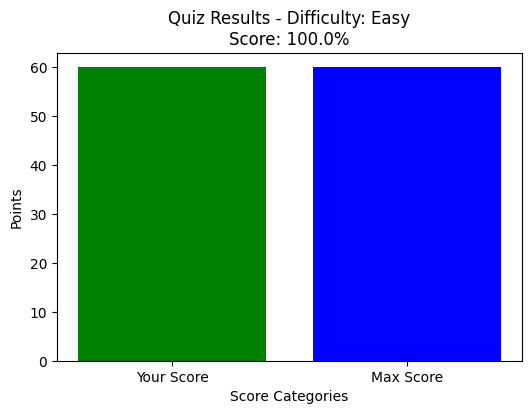

In [8]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

name_basics = pd.read_csv(
    'data/name.basics.tsv', 
    sep='\t', 
    usecols=['nconst', 'primaryName', 'primaryProfession', 'knownForTitles'],
    dtype={'nconst': 'str', 'primaryName': 'str', 'primaryProfession': 'str', 'knownForTitles': 'str'}
)

title_basics = pd.read_csv(
    'data/title_basics_reduced.csv', 
    usecols=['tconst', 'titleType', 'primaryTitle', 'genres'],
    dtype={'tconst': 'str', 'titleType': 'str', 'primaryTitle': 'str', 'genres': 'str'}
)

title_ratings = pd.read_csv(
    'data/title.ratings.tsv', 
    sep='\t', 
    usecols=['tconst', 'numVotes'],
    dtype={'tconst': 'str', 'numVotes': 'int32'}
)

title_principals = pd.read_csv(
    'data/title_principals_reduced.csv',
    usecols=['tconst', 'ordering', 'nconst', 'category'],
    dtype={'tconst': 'str', 'ordering': 'int32', 'nconst': 'str', 'category': 'category'}
)

filtered_titles = title_basics[
    (title_basics['titleType'] == 'movie') & 
    (~title_basics['genres'].str.contains(r'Animation|News|\\N|Film-Noir|Talk-Show|Adult|Reality-TV|Game-Show', na=False, regex=True))
]

filtered_title_principals = title_principals[title_principals['category'].isin(['actor', 'actress', 'director'])]
filtered_movies_with_ratings = filtered_titles.merge(title_ratings, on='tconst', how='inner')

top_450_votes = filtered_movies_with_ratings.nlargest(450, 'numVotes')

easy = top_450_votes.iloc[0:150]
medium = top_450_votes.iloc[150:300]
hard = top_450_votes.iloc[300:450]

movie_data = filtered_title_principals.merge(name_basics, on='nconst', how='inner')

def get_questions(level):
    if level == 'easy':
        movies = easy
        points = 10
    elif level == 'medium':
        movies = medium
        points = 20
    elif level == 'hard':
        movies = hard
        points = 30
    else:
        print("Invalid level selected. Please choose easy, medium, or hard.")
        return

    questions = []
    selected_movies = set()

    actor_data = movie_data[
        (movie_data['category'].isin(['actor', 'actress'])) & (movie_data['ordering'] == 1)
    ].merge(movies, on='tconst')
    
    actor_questions = random.sample(list(actor_data.to_dict(orient='records')), k=4)
    
    for row in actor_questions:
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "actor"))
            selected_movies.add(row['tconst'])

    director_data = movie_data[movie_data['category'] == 'director'].merge(movies, on='tconst')

    director_questions = random.sample(list(director_data.to_dict(orient='records')), k=2)
    
    for row in director_questions:
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "director"))
            selected_movies.add(row['tconst'])

    return questions, points

def ask_question(movie_title, correct_answer, role):
    alternatives = [correct_answer]

    if role == "actor":
        # Filter main actors (ordering 1 or 2) from the 450 most voted movies
        eligible_actors = movie_data[
            (movie_data['category'].isin(['actor', 'actress'])) &
            (movie_data['ordering'].isin([1, 2])) &
            (movie_data['tconst'].isin(top_450_votes['tconst']))
        ]['primaryName'].unique()
    elif role == "director":
        # Filter directors of the 450 most voted films
        eligible_directors = movie_data[
            (movie_data['category'] == 'director') &
            (movie_data['tconst'].isin(top_450_votes['tconst']))
        ]['primaryName'].unique()

    # Generate incorrect role-specific alternatives
    while len(alternatives) < 4:
        if role == "actor":
            random_choice = np.random.choice(eligible_actors)
        elif role == "director":
            random_choice = np.random.choice(eligible_directors)

        if random_choice not in alternatives:
            alternatives.append(random_choice)

    np.random.shuffle(alternatives)  # Shuffle the alternatives

    question_text = (
        f"Who starred the movie \"{movie_title}\"?" if role == "actor"
        else f"Who is the director of the movie \"{movie_title}\"?"
    )
    print(f"\n{question_text}")
    for i, option in enumerate(alternatives, 1):
        print(f"{i}. {option}")
    return alternatives.index(correct_answer) + 1
def start_quiz():
    print("Welcome to the Movie Quiz!")
    
    # Validation of the level of difficulty
    while True:
        level = input("Choose difficulty level (easy, medium, hard): ").lower()
        if level in ['easy', 'medium', 'hard']:
            break
        else:
            print("Invalid level selected. Please choose 'easy', 'medium', or 'hard'.")
    
    questions, points = get_questions(level)
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points 
    question_count = 0  # Counter of valid questions answered
    
    for movie_title, correct_answer, role in questions:
        correct_option = ask_question(movie_title, correct_answer, role)
        
        while True:
            try:
                answer = int(input("Your answer (1-4): "))
                if answer < 1 or answer > 4:
                    print("Invalid input. Please enter a number between 1 and 4.")
                    continue  # Doesn't count as a valid try
                break
            except ValueError:
                print("Invalid input. Please enter a number between 1 and 4.")
        
        # Valid answer, it's procesed
        question_count += 1
        if answer == correct_option:
            print("Correct!")
            score += points
        else:
            print(f"Incorrect. The correct answer was {correct_answer}.")
    
    print(f"\nQuiz finished! Your final score is: {score} out of {max_score}.")
    
    plot_score(score, max_score, level)

def plot_score(user_score, max_score, level):
    categories = ['Your Score', 'Max Score']
    scores = [user_score, max_score]
    
    percentage = np.round((user_score / max_score) * 100, 2)
    print(f"You scored {percentage}% of the maximum points.")

    plt.figure(figsize=(6, 4))
    plt.bar(categories, scores, color=['green', 'blue'])
    plt.xlabel("Score Categories")
    plt.ylabel("Points")
    plt.title(f"Quiz Results - Difficulty: {level.capitalize()}\nScore: {percentage}%")
    plt.show()

start_quiz()
